# US Housing Data by Phillips, F. (Kaggle)

In [26]:
housing_data = read.csv("Housing_cleaned.csv")

Ranger result

Call:
 ranger(formula = ListedPrice ~ State + City + Street + Zipcode +      Bedroom + Bathroom + Area + PPSq + LotArea + MarketEstimate +      RentEstimate + Latitude + Longitude, data = train_data, num.trees = 500,      mtry = 4, importance = "impurity", na.action = "na.omit") 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      11882 
Number of independent variables:  13 
Mtry:                             4 
Target node size:                 5 
Variable importance mode:         impurity 
Splitrule:                        variance 
OOB prediction error (MSE):       43925780579 
R squared (OOB):                  0.9613333 
Root Mean Squared Error (RMSE): 336698.1 
R-squared (R²): 0.92765 


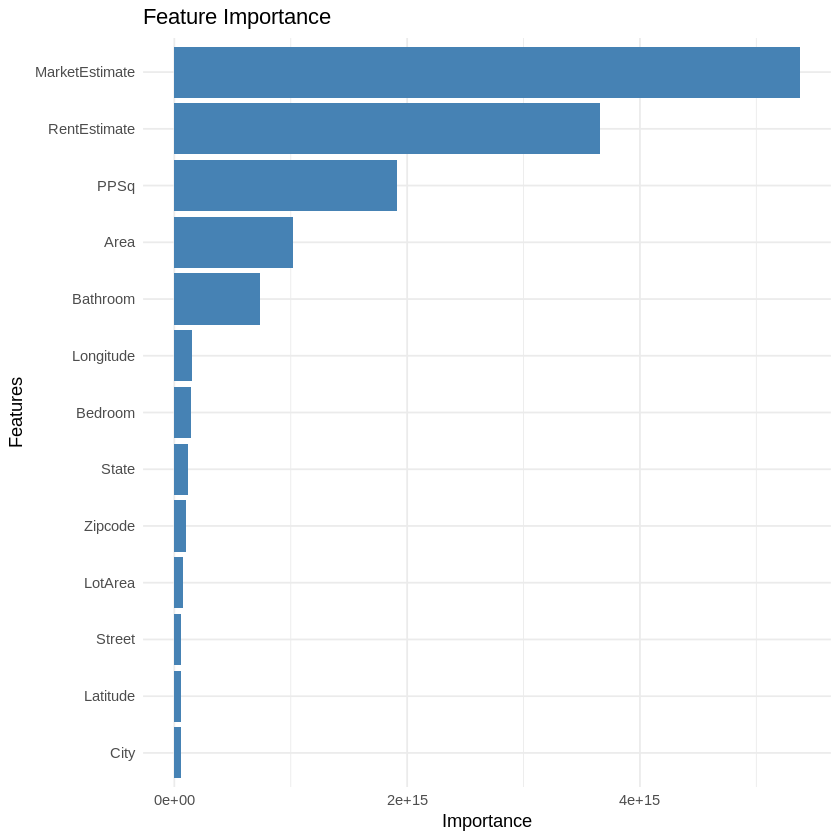

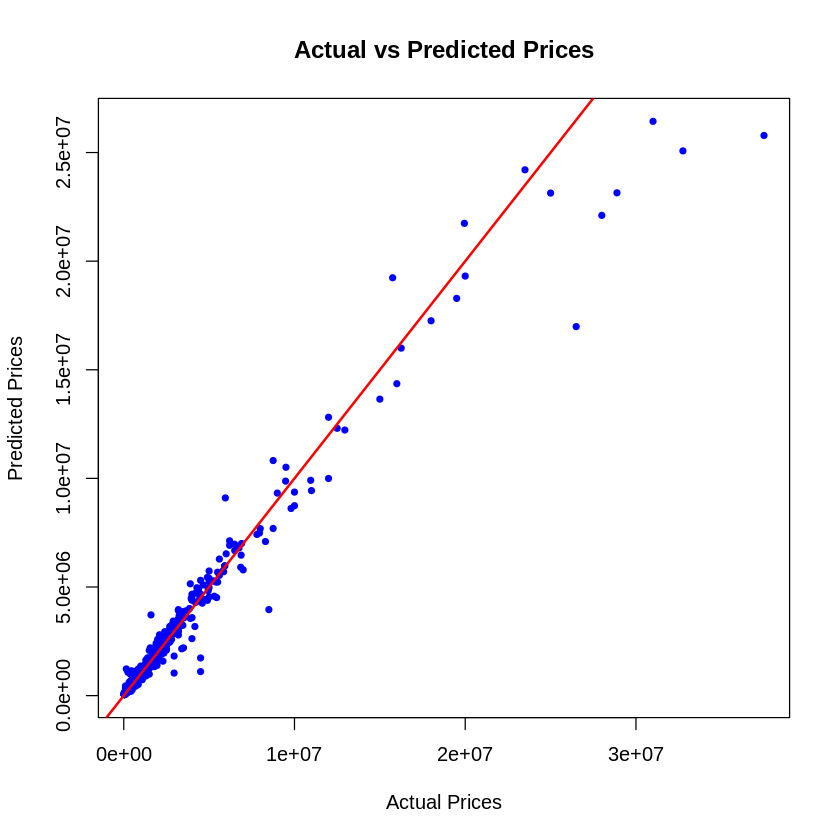

In [34]:
# Packages and Libraries needed for Random Forest analysis
install.packages("ranger") # This package handles more factor levels
library(ranger)
library(ggplot2)

# 1. Load and Preprocess the Data
data <- housing_data

# Select relevant variables and handle missing data
data <- na.omit(data[, c("State", "City", "Street", "Zipcode", "Bedroom",
                         "Bathroom", "Area", "PPSq", "LotArea", "MarketEstimate",
                         "RentEstimate", "Latitude", "Longitude", "ListedPrice")])

# Convert categorical variables to factors
data$State <- as.factor(data$State)
data$City <- as.factor(data$City)
data$Street <- as.factor(data$Street)
data$Zipcode <- as.factor(data$Zipcode)

# 2. Split Data into Training and Testing Sets
set.seed(123)
train_indices <- sample(1:nrow(data), 0.8 * nrow(data))
train_data <- data[train_indices, ]
test_data <- data[-train_indices, ]

# 3. Train the Random Forest Model
rf_model <- ranger(
  formula = ListedPrice ~ State + City + Street + Zipcode + Bedroom + Bathroom +
            Area + PPSq + LotArea + MarketEstimate + RentEstimate + Latitude +
            Longitude,
  data = train_data,
  num.trees = 500,
  mtry = 4,
  importance = "impurity",
  na.action = "na.omit"
)

# Print model summary
print(rf_model)

# 4. Evaluate Model Performance
# Predict on test data
predictions <- predict(rf_model, data = test_data)$predictions

# Calculate RMSE and R-squared
rmse <- sqrt(mean((predictions - test_data$ListedPrice)^2))
r_squared <- 1 - (sum((predictions - test_data$ListedPrice)^2) /
                  sum((test_data$ListedPrice - mean(test_data$ListedPrice))^2))

cat("Root Mean Squared Error (RMSE):", rmse, "\n")
cat("R-squared (R²):", r_squared, "\n")

# 5. Feature Importance Plot
importance <- rf_model$variable.importance
importance_df <- data.frame(Feature = names(importance), Importance = importance)

ggplot(importance_df, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Feature Importance", x = "Features", y = "Importance") +
  theme_minimal()

# Actual vs Predicted Prices Plot
predictions <- rf_model$predictions
plot(train_data$ListedPrice, predictions,
     main = "Actual vs Predicted Prices",
     xlab = "Actual Prices",
     ylab = "Predicted Prices",
     col = "blue", pch = 20)
# Perfect prediction line
abline(0, 1, col = "red", lwd = 2)